In [114]:
!pip install xgboost

In [115]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

## M01AB

In [116]:
cols = ["M01AB","Year","Month","Hour","Weekday Name"]

In [117]:
data = pd.read_csv('data_set/salesdaily.csv',usecols=cols)

In [118]:
data.head(10)

,M01AB,Year,Month,Hour,Weekday Name
0,0.00,2014,1,248,Thursday
1,8.00,2014,1,276,Friday
2,2.00,2014,1,276,Saturday
3,4.00,2014,1,276,Sunday
4,5.00,2014,1,276,Monday
5,0.00,2014,1,276,Tuesday
6,5.33,2014,1,276,Wednesday
7,7.00,2014,1,276,Thursday
8,5.00,2014,1,276,Friday
9,5.00,2014,1,276,Saturday


In [119]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [120]:
data.head()

,M01AB,Year,Month,Hour,Weekday Name
0,0.0,2014,1,248,4
1,8.0,2014,1,276,0
2,2.0,2014,1,276,2
3,4.0,2014,1,276,3
4,5.0,2014,1,276,1


In [121]:
check_features = data.drop(['M01AB'],axis=1)
target = data['M01AB']

In [122]:
x_train = check_features[:-7]
y_train = target[:-7]
x_test = check_features[-7:]
y_test = target[-7:]

In [123]:
y_test = np.asarray(y_test)
y_test

array([5.18, 5.  , 7.34, 3.84, 4.  , 7.34, 0.33])

### Decision Tree Regressor

In [124]:
dt_model = DecisionTreeRegressor(criterion='mse')

In [125]:
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

In [126]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
predictions_dt = dt_model.predict(x_test)

In [128]:
y_test = np.asarray(y_test)

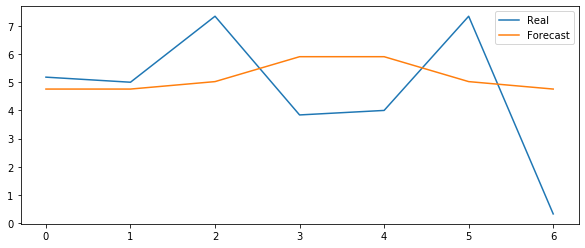

In [129]:
fig = plt.figure(figsize=(10,4))
plt.plot(y_test,label='Real')
plt.plot(predictions_dt,label='Forecast')
plt.legend()

In [162]:
rmse_dt = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse_dt)

2.28916263091692


### Linear Regression

In [163]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
predictions_lr = lr_model.predict(x_test)

In [133]:
predictions_lr

array([ 5.42144422,  5.49572384,  5.64428307,  5.57000345,  5.53286365,
        5.60714326, -8.38339855])

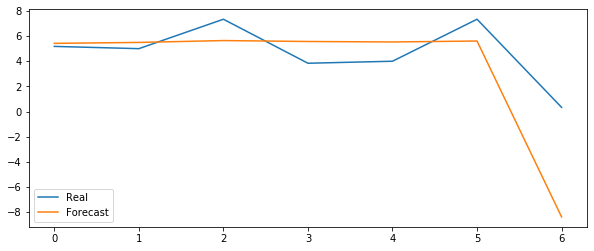

In [134]:
fig = plt.figure(figsize=(10,4))
plt.plot(y_test,label='Real')
plt.plot(predictions_lr,label='Forecast')
plt.legend()

In [164]:
rmse_lr= math.sqrt(mean_squared_error(y_test,predictions))
print(rmse_lr)

2.28916263091692


In [136]:
# Parameters
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=10)]
max_depth = [int(x) for x in np.linspace(3,10,num=7)]

### Random Forest

In [137]:
rf = RandomForestRegressor(random_state = 1)

In [138]:
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

In [139]:
model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)

In [140]:
model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [141]:
model.best_params_

{'max_depth': 4, 'n_estimators': 11}

In [142]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 12)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=12, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

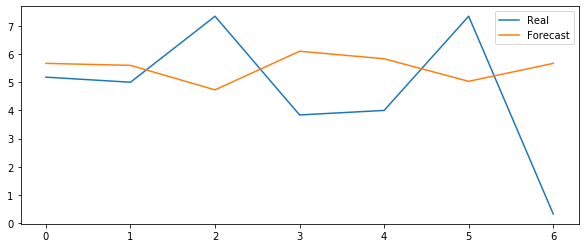

In [143]:
predictions_rf = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(10,4))
plt.plot(y_test,label='Real')
plt.plot(predictions_rf,label='Forecast')
plt.legend()

In [165]:
rmse_rf = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse_rf)

2.28916263091692


### XGBoost

In [145]:
data_dmatrix = xgb.DMatrix(data=features,label = target)

In [146]:
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]

In [147]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')

In [148]:
parameters = {
    'n_estimators' : [8,9,10,11,12],
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}

In [149]:
model = GridSearchCV(xg, param_grid=parameters)

In [150]:
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 4,
 'n_estimators': 8}

In [151]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',max_depth = 5,colsample_bytree= 0.5,learning_rate=0.25,n_estimators = 12)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=12, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [152]:
#xg_reg.fit(x_train,y_train)

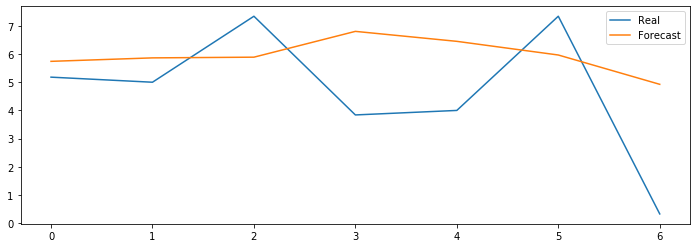

In [153]:
predictions_xg = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(12,4))
plt.plot(y_test,label='Real')
plt.plot(predictions_xg,label='Forecast')
plt.legend()

In [154]:
rmse_xg = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse_xg)

2.28916263091692


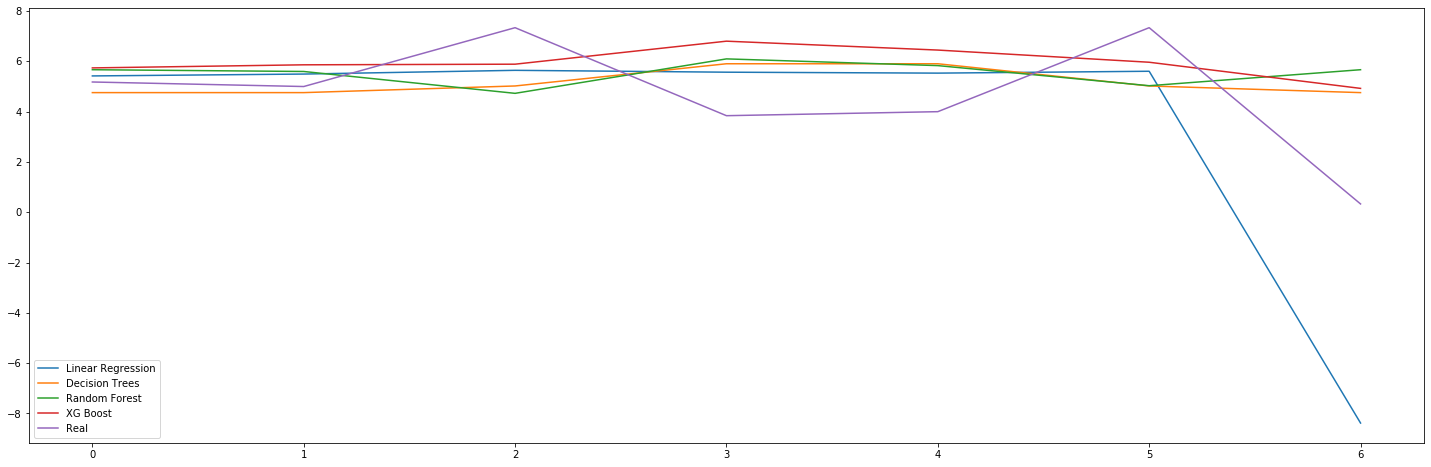

In [160]:
fig = plt.figure(figsize = (25,8))
plt.plot(predictions_lr)
plt.plot(predictions_dt)
plt.plot(predictions_rf)
plt.plot(predictions_xg)
plt.plot(y_test)
plt.legend(["Linear Regression","Decision Trees","Random Forest","XG Boost","Real"])

In [171]:
all_metrics = {"lr":rsme_lr,"dt" :rsme_dt,"rf" : rsme_rf,"xg" : rsme_xg}
plt.figure(figsize = (15,7))
sns.set_theme(style = 'white')
plt.bar(all_metrics.keys(),all_metrics.values())
plt.title('Metrics Performance', size = 10)
plt.xlable("Models", size = 8)
plt.ylable("Metric : RSME", size = 8)
plot.show()

NameError: name 'rsme_lr' is not defined

## M01AE

In [91]:
cols = ["M01AE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('data_set/salesdaily.csv',usecols=cols)

In [ ]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [ ]:
features = data.drop(['M01AE'],axis=1)
target = data['M01AE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)

In [ ]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print("LR :" ,rmse)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=10)]
max_depth = [int(x) for x in np.linspace(5,10,num=5)]

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

In [ ]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : [8,9,10,11,12],
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

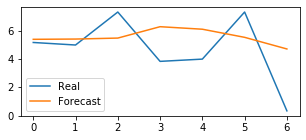

In [113]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 7,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

## N02BA

In [ ]:
cols = ["N02BA","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [ ]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [ ]:
features = data.drop(['N02BA'],axis=1)
target = data['N02BA']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 5,colsample_bytree= 0.3,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

## N02BE

In [ ]:
cols = ["N02BE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [ ]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N02BE'],axis=1)
target = data['N02BE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=4)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 12)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.5,learning_rate=0.15)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

## N05B

In [ ]:
cols = ["N05B","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [ ]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N05B'],axis=1)
target = data['N05B']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=5)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
rf = RandomForestRegressor(random_state = 1,max_depth = 6,n_estimators = 7)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 5,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

## N05C

In [ ]:
cols = ["N05C","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [ ]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N05C'],axis=1)
target = data['N05C']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=10)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
rf = RandomForestRegressor(random_state = 1,max_depth = 6,n_estimators = 13)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 13,max_depth = 8,colsample_bytree= 0.5,learning_rate=0.1)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

## R03

In [ ]:
cols = ["R03","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['R03'],axis=1)
target = data['R03']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
rf = RandomForestRegressor(random_state = 1,max_depth = 4,n_estimators = 6)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.5,learning_rate=0.15)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [98]:
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

AttributeError: 'Line2D' object has no property 'x_train'

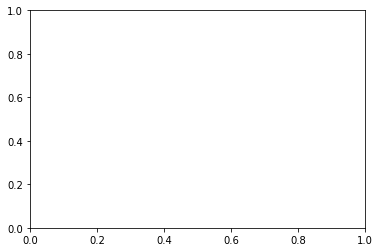

In [101]:
plt.plot(xgb,x_train=X_train_scaled, 
                 x_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)